### Install Required Packages

In [1]:
! pip install numpy pandas sklearn

### Imports

In [2]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.rcParams.update({'figure.figsize': (10,8)})

### Helper methods

In [3]:
def plot_coeffs(lambdas, coeffs):
    ax = plt.gca()

    coeffs = np.reshape(coeffs, (len(coeffs), 9))

    ax.plot(lambdas, coeffs)
    ax.set_xscale('log')
    plt.xlabel('lambda')
    plt.ylabel('coefficients')
    ax.legend(['bias', 'lcavol', 'weight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45', 'lpsa'])
    plt.title('Ridge coefficients as a function of the regularization')
    plt.axis('tight')
    plt.show()


def plot_rmse(lambdas, rmse):
    ax = plt.gca()

    ax.plot(lambdas, rmse)
    ax.set_xscale('log')
    plt.xlabel('Lambda')
    plt.ylabel('RMSE')
    plt.title('Root Mean Squared Error')
    plt.axis('tight')
    plt.show()

### Ridge Regression Model

In [4]:
class CustomRidgeRegression:
    def __init__(self):
        self.coeffs_ = None
        self.lambda_ = None

    def fit(self, X, y, lambda_parameter):
        """
        Fits the Linear Regression model
        :param X: dataframe contains the observations
        :param y: dataframe contains the target values
        """
        X = X.to_numpy()
        y = y.to_numpy()

        self.lambda_ = lambda_parameter

        # Append an extra column with ones to X (intercept)
        X_intercept = np.c_[np.ones((X.shape[0], 1)), X]

        identity = np.identity(X_intercept.shape[1])
        identity[0, 0] = 0

        lambda_I = self.lambda_ * identity

        self.coeffs_ = np.linalg.inv(X_intercept.T.dot(X_intercept) + lambda_I).dot(X_intercept.T).dot(y)

    def predict(self, X):
        """
        Predicts the values of the given data
        :param X: dataframe contains the observations to predict
        :return The predicted value
        """
        X = X.to_numpy()
        n = X.shape[0]

        # Append an extra column with ones to X
        X_intercept = np.c_[np.ones((X.shape[0], 1)), X]
        return np.dot(X_intercept, self.coeffs_)

### Read data and split dataset to train and test

In [5]:
df = pd.read_csv('datasets/rr/prostate.data', header=0, sep='\t')
df.columns = ['id', 'lcavol', 'weight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45', 'lpsa', 'train']
print(df)

train_df = df[df['train'] == 'T']
test_df = df[df['train'] == 'F']

X_train = train_df[['lcavol', 'weight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']]
X_test = test_df[['lcavol', 'weight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']]
y_train = train_df[['lpsa']]
y_test = test_df[['lpsa']]

coeffs = []
rmse = []

    id    lcavol    weight  age      lbph  svi       lcp  gleason  pgg45  \
0    1 -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0   
1    2 -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0   
2    3 -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20   
3    4 -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0   
4    5  0.751416  3.432373   62 -1.386294    0 -1.386294        6      0   
..  ..       ...       ...  ...       ...  ...       ...      ...    ...   
92  93  2.830268  3.876396   68 -1.386294    1  1.321756        7     60   
93  94  3.821004  3.896909   44 -1.386294    1  2.169054        7     40   
94  95  2.907447  3.396185   52 -1.386294    1  2.463853        7     10   
95  96  2.882564  3.773910   68  1.558145    1  1.558145        7     80   
96  97  3.471966  3.974998   68  0.438255    1  2.904165        7     20   

        lpsa train  
0  -0.430783     T  
1  -0.162519     T  
2  -0.162519     T  
3  

### Train Ridge Regression Model with l = [0.002, 2.0] with step 0.004 and l = 10000

In [6]:
rr = CustomRidgeRegression()

lambdas = np.arange(0.002, 2.0, 0.004)
for i in lambdas:
    rr.fit(X_train, y_train, i)
    coeffs.append(rr.coeffs_.tolist())
    y_pred = rr.predict(X_test)
    rmse.append(mean_squared_error(y_test, y_pred, squared=True))

rr.fit(X_train, y_train, 10000)
coeffs.append(rr.coeffs_.tolist())
lambdas = np.append(lambdas, 10000.0)
y_pred = rr.predict(X_test)
rmse.append(mean_squared_error(y_test, y_pred, squared=True))

### Plot Ridge Regression Coefficients according to lambdas & RMSE

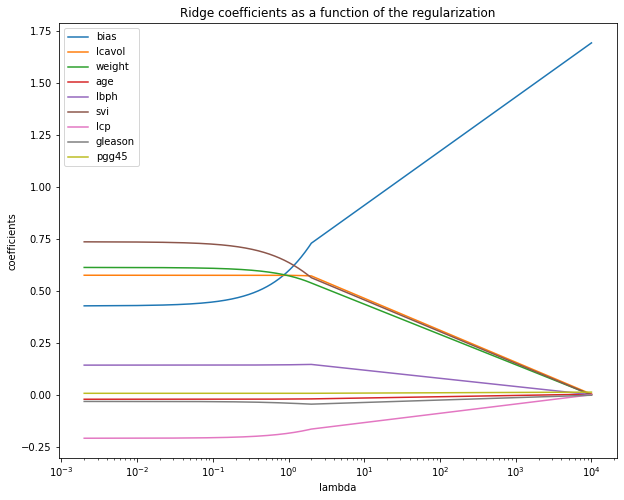

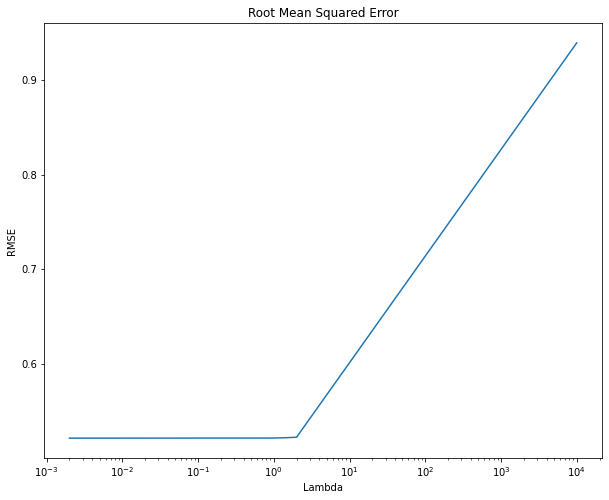

In [7]:
plot_coeffs(lambdas, coeffs)
plot_rmse(lambdas, rmse)

### Find l that minimizes the Root Mean Square Error

In [8]:
idx = rmse.index(min(rmse))
optimal_lambda = lambdas[idx]
print(f'Optimal lambda: {optimal_lambda}')
print(f'Coefficients: {coeffs[idx]}')
print(f'RMSE: {rmse[idx]}')


Optimal lambda: 0.354
Coefficients: [[0.4939205964598763], [0.576747003107279], [0.5993205294774145], [-0.018674384427299545], [0.1453820370773281], [0.6983674176460376], [-0.19718780977168418], [-0.03293609509756401], [0.009497899097753473]]
RMSE: 0.5211839118146687


### For the minimum l, plot 15 random predicted values contrary to their actual values

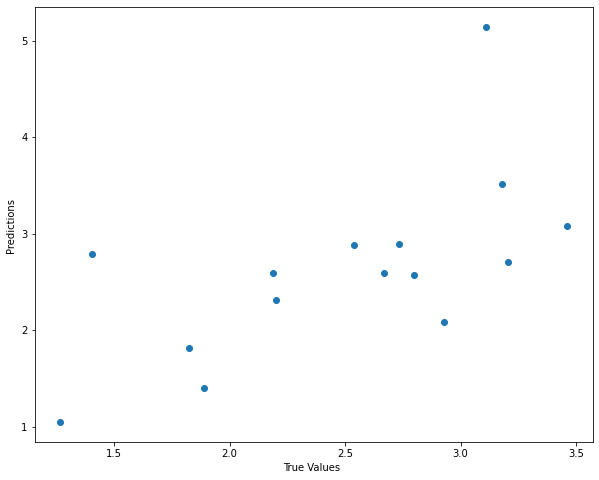

In [9]:
rr.fit(X_train, y_train, optimal_lambda)
y_pred = rr.predict(X_test)

random_indexes = random.sample(range(0, len(y_pred)), 15)

random_pred = []
random_actual = []
y_test_list = y_test['lpsa'].tolist()

for idx in random_indexes:
    random_pred.append(y_pred[idx])
    random_actual.append(y_test_list[idx])

g = plt.scatter(random_pred, random_actual)
# g.axes.set_yscale('log')
# g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
# g.axes.axis('equal')
# g.axes.axis('square')
plt.show()

### Comparison between Ridge Regression and Linear Regression

Linear Regression model

In [10]:
class MultipleLinearRegression:

    def __init__(self):
        self.coefs_ = None

    def fit(self, X: pd.DataFrame, y: pd.DataFrame):
        """
        Fits the Linear Regression model
        :param X: dataframe contains the observations
        :param y: dataframe contains the target values
        """
        X = X.to_numpy()
        y = y.to_numpy()
        n = X.shape[0]

        # Append an extra column with ones to X
        ones_array = np.ones((n,1))
        X = np.hstack((ones_array, X))

        # Calculate (X^T X)
        X_transpose = np.transpose(X)
        X_transpose_X = np.dot(X_transpose, X)

        # Calculate the b = (X^T X)^-1 X^T Y
        inv_X_transponse_X = np.linalg.inv(X_transpose_X)
        self.coefs_ = np.dot(np.dot(inv_X_transponse_X, X_transpose), y)

    def predict(self, X: pd.DataFrame):
        """
        Predicts the values of the given data
        :param X: dataframe contains the observations to predict
        :return The predicted value
        """
        X = X.to_numpy()
        n = X.shape[0]

        # Append an extra column with ones to X
        ones_array = np.ones((n,1))
        X = np.hstack((ones_array, X))
        return np.dot(X, self.coefs_)

### Train and predict Linear Regression

In [11]:
model = MultipleLinearRegression()
model.fit(X_train, y_train)

print(f'Bias:\n{model.coefs_[0]}\n')
print(f'Coefficients:\n{model.coefs_[1:]}\n')

y_pred_lr = model.predict(X_test)

print(f'Linear Regression RMSE: {mean_squared_error(y_test, y_pred_lr, squared=True)}')

Bias:
[0.42917013]

Coefficients:
[[ 0.57654319]
 [ 0.61402   ]
 [-0.01900102]
 [ 0.14484808]
 [ 0.73720864]
 [-0.20632423]
 [-0.02950288]
 [ 0.00946516]]

Linear Regression RMSE: 0.5212740055076177


### Residual plot for both models

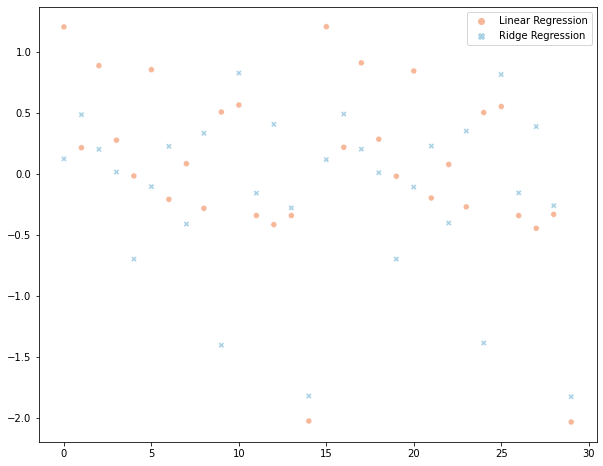

In [12]:
res_np = np.array([y_pred_lr-y_test, y_pred-y_test])
residuals= pd.DataFrame(np.reshape(res_np, (res_np.shape[1], 2)),
                        columns=['Linear Regression', 'Ridge Regression'])

sns.scatterplot(data=residuals, marker='o', palette='RdBu')
plt.show()